In [64]:
from hc3211_fun import stitch_scans, qconvert_e16014, stack_plot, basic_plot
from ipywidgets import interact
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import numpy as np
import h5py

Load some 3D array data you can play with:

In [65]:
scans = [42,43,44,45]
data = stitch_scans(scans)
qx, qy, qz = qconvert_e16014(scans)

`IndexTracker` is a slight modification of [this](https://matplotlib.org/gallery/animation/image_slices_viewer.html) from the mpl docs. Originally written to work with `imshow`, it can be made to function with `pcolormesh` as well; make sure that when using `QuadMesh.set_array()` the input array is flattened as well as only the *n-1* indexes taken -- see [this](https://stackoverflow.com/questions/29009743/using-set-array-with-pyplot-pcolormesh-ruins-figure) for an explanation (it has to do with how the QuadMesh is indexed, check also the mpl docs).

Run it and scroll through the chosen projection (not actually a projection...).

In [68]:
class IndexTracker(object):
    
    def __init__(self, ax, mesh, init, x, y, z, projection='x'):
        self.ax = ax
        self.projection = projection
        if self.projection == 'x':
            self.q1, self.q2 = y[0], z[0]
            self.slices, rows, cols = mesh.shape
            self.mesh = mesh
            self.ind = init # start from middle of array
            self.im = ax.pcolormesh(self.q1, self.q2, self.mesh[self.ind,:-1,:-1],cmap='jet')
        elif self.projection == 'y':
            self.q1, self.q2 = x[:,:,0], z[:,:,0]
            rows, cols, self.slices = mesh.shape
            self.mesh = mesh
            self.ind = init # start from middle of array
            self.im = ax.pcolormesh(self.q1, self.q2, self.mesh[:,:,self.ind],cmap='jet')
        elif self.projection == 'z':
            self.q1, self.q2 = x[:,0,:], y[:,0,:]
            rows, self.slices, cols = mesh.shape
            self.mesh = mesh
            self.ind = init # start from middle of array
            self.im = ax.pcolormesh(self.q1, self.q2, self.mesh[:,self.ind,:],cmap='jet')

        self.im.axes.set_aspect('equal')
        self.ax.set_title('slice {0}'.format(self.ind))
        self.update()

    def onscroll(self, event):
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        if self.projection == 'x':
            self.im.set_array(self.mesh[self.ind,:-1,:-1].ravel())
        if self.projection == 'y':
            self.im.set_array(self.mesh[:-1,:-1,self.ind].ravel())        
        if self.projection == 'z':
            self.im.set_array(self.mesh[:-1,self.ind,:-1].ravel())             
        self.im.axes.set_aspect('equal')
        self.ax.set_title('slice {0}'.format(self.ind))
        self.im.axes.figure.canvas.draw()


fig, ax = plt.subplots()
tracker = IndexTracker(ax, np.log(data),230, qx, qy, qz, projection='y')
fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()

Same as the above but with a `Slider`. Makes possible to jump between images but is a bit laggy. Using `pcolorfast` makes no difference and in fact it does not seem to work if a `np.log(array)` is passed to it.

**x**:

In [59]:
from matplotlib.widgets import Slider

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)
im = plt.pcolormesh(qy[0],qz[0],np.log(data[200,:-1,:-1]),cmap='jet')
plt.axis('image')


axcolor = 'lightgoldenrodyellow'
axslide = plt.axes([0.2, 0.1, 0.65, 0.03], facecolor=axcolor)
slide = Slider(axslide, 'imnr',1, data.shape[0],valinit=200, valfmt='%1d')


def update(val):
    imnr = slide.val
    im.set_array(np.log(data[int(imnr),:-1,:-1]).ravel())
    fig.canvas.draw()
slide.on_changed(update)
plt.show()

**y:**

In [67]:
from matplotlib.widgets import Slider

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)
im = plt.pcolormesh(qx[:,:,0], qz[:,:,0],np.log(data[:-1,:-1,200]),cmap='jet')
plt.axis('image')


axcolor = 'lightgoldenrodyellow'
axslide = plt.axes([0.2, 0.1, 0.65, 0.03], facecolor=axcolor)
slide = Slider(axslide, 'imnr',1, data.shape[2],valinit=200, valfmt='%1d')


def update(val):
    imnr = slide.val
    im.set_array(np.log(data[:-1,:-1,int(imnr)]).ravel())
    fig.canvas.draw()
slide.on_changed(update)
plt.show()

**z:**

In [69]:
from matplotlib.widgets import Slider

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)
im = plt.pcolormesh(qx[:,0,:], qy[:,0,:],np.log(data[:-1,200,:-1]),cmap='jet')
plt.axis('image')


axcolor = 'lightgoldenrodyellow'
axslide = plt.axes([0.2, 0.1, 0.65, 0.03], facecolor=axcolor)
slide = Slider(axslide, 'imnr',1, data.shape[1],valinit=200, valfmt='%1d')


def update(val):
    imnr = slide.val
    im.set_array(np.log(data[:-1,int(imnr),:-1]).ravel())
    fig.canvas.draw()
slide.on_changed(update)
plt.show()

And now some simple projections to check the dataset:

In [7]:
plt.pcolormesh(qx[:,:,0],qz[:,:,0],np.log(data.sum(axis=2)),cmap='jet');plt.show()

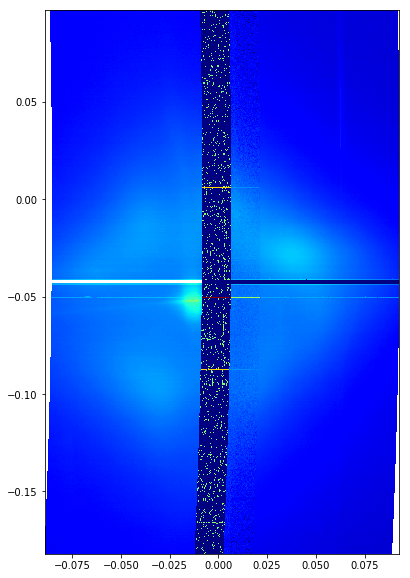

In [19]:
plt.figure(figsize=(10,10))
plt.pcolormesh(qx[:,0,:],qy[:,0,:],np.log(data[:,450:,:].sum(axis=1)),cmap='jet');plt.axis('image');plt.show()

In [ ]:
plt.pcolormesh(qx[:,:,0],qz[:,:,0],np.log(data.sum(axis=2)));plt.show()